# 1. Business Problem

## 1.1 Problem Description
Nothing is more comforting than being greeted by your favorite drink just as you walk through the door of the corner café. While a thoughtful barista knows you take a macchiato every Wednesday morning at 8:15, it’s much more difficult in a digital space for your preferred brands to personalize your experience.

TalkingData, China’s largest third-party mobile data platform, understands that everyday choices and behaviors paint a picture of who we are and what we value. Currently, TalkingData is seeking to leverage behavioral data from more than 70% of the 500 million mobile devices active daily in China to help its clients better understand and interact with their audiences.

In this competition, Kagglers are challenged to build a model predicting users’ demographic characteristics based on their app usage, geolocation, and mobile device properties. Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

https://www.kaggle.com/c/talkingdata-mobile-user-demographics/overview

## 1.2 Problem Statement
In this competition, we need to predict the demographics of a user (gender and age) based on their app download and usage behaviors.

## 1.3 Sources
https://www.kaggle.com/c/talkingdata-mobile-user-demographics/overview<br>
Research Paper: https://www.idiap.ch/project/mdc/publications/files/mdc-final241-ying.pdf<br>
Research Paper: https://www.aaai.org/ocs/index.php/ICWSM/ICWSM16/paper/viewFile/13047/12816<br>
Blogs: https://mc.ai/talking-data-mobile-user-demographics/<br>
Blogs: https://medium.com/analytics-vidhya/talking-data-user-demographics-19e3d15627b5<br>
Kaggle Solution: https://www.kaggle.com/kylingu/talkingdata-learning<br>
Kaggle Solution: https://www.kaggle.com/tuzhen/brand-and-model-based-benchmarks-d4d1ce<br>

## 1.4 Business Objective and Constraints
1. Need to predict the demographics of a user (gender and age) based on their app download and usage behaviors.
2. Minimize the log loss
3. No Low Latency requirement
4. Probability value of prediction is required for each class.

# 2. Machine Learning Problem

## 2.1 Data

### 2.1.1 Data Overview
Data is obtained from - https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data

Following are the data files:
1. <b>gender_age_train.csv, gender_age_test.csv</b> - the training and test set
2. <b>group</b>: this is the target variable you are going to predict
3. <b>events.csv, app_events.csv</b> - when a user uses TalkingData SDK, the event gets logged in this data. Each event has an event id, location (lat/long), and the event corresponds to a list of apps in app_events.timestamp: when the user is using an app with TalkingData SDK
4. <b>app_labels.csv</b> - apps and their labels, the label_id's can be used to join with label_categories
5. <b>label_categories.csv</b> - apps' labels and their categories in text
6. <b>phone_brand_device_model.csv</b> - device ids, brand, and models.phone_brand: note that the brands are in Chinese (translation courtesy of user fromandto) 

## 2.2 Mapping the real world problem to a Machine Learning Problem 

### 2.2.1 Type of Machine Learning Problem
- Need to predict the demographics of a user (gender and age) based on their app download and usage behaviors.
- This can be seen as a Multi-Class Classification problem

### 2.2.2 Performance Metrics
- Log Loss is the metric set by Kaggle for Performace Measurement of the model

### 2.2.3 Machine Learning Objective and Constraint
- Minimize the log loss
- Provide some interpretability 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
import os

myDir = 'gdrive/My Drive/AAIC_Self_Case_Study_1'
print(os.listdir(myDir))
os.chdir(myDir)
print(os.listdir())

In [ ]:
# REF: https://thispointer.com/python-how-to-unzip-a-file-extract-single-multiple-or-all-files-from-a-zip-archive/
from zipfile import ZipFile

with ZipFile('talkingdata-mobile-user-demographics.zip', 'r') as zipObj:
    zipObj.extractall()

In [ ]:
import os
for files in os.listdir():
    print(files)
    if files.endswith("zip"):
        with ZipFile(files, 'r') as zipObj:
            zipObj.extractall()

#### Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

#### Reading various input files

In [3]:
ageGenderTrain = pd.read_csv('gender_age_train.csv', dtype={'device_id':np.str})
ageGenderTest = pd.read_csv('gender_age_test.csv', dtype={'device_id':np.str})
phoneBrand = pd.read_csv('phone_brand_device_model.csv', dtype={'device_id':np.str})
appLabels = pd.read_csv('app_labels.csv', dtype={'app_id':np.str})
eventsData = pd.read_csv('events.csv', parse_dates=['timestamp'], dtype={'device_id':np.str, 'event_id':np.str})
appEventsData = pd.read_csv('app_events.csv', dtype={'app_id':np.str, 'event_id':np.str})

# 3. Detailed EDA

## 3.1 Working on Train-Test Data

In [4]:
print(ageGenderTrain.shape)
print('Columns: ', ageGenderTrain.columns)
print('\nColumns with NULL value:\n', ageGenderTrain.isnull().any())
print('\nDuplicate Records:', ageGenderTrain.duplicated().sum())
print('\nNo. of UNIQUE Records: ', ageGenderTrain.device_id.nunique())

(74645, 4)
Columns:  Index(['device_id', 'gender', 'age', 'group'], dtype='object')

Columns with NULL value:
 device_id    False
gender       False
age          False
group        False
dtype: bool

Duplicate Records: 0

No. of UNIQUE Records:  74645


##### There are no DUPLICATE records in the TRAIN Data. Also, there are no columns with NULL Value

#### EDA for GENDER

Unique GENDERs 2
M    47904
F    26741
Name: gender, dtype: int64


M    0.641758
F    0.358242
Name: gender, dtype: float64

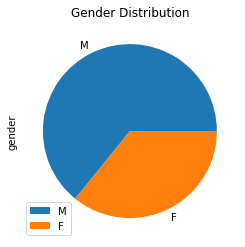

In [5]:
print('Unique GENDERs', ageGenderTrain.gender.nunique())
print(ageGenderTrain.gender.value_counts())
ageGenderTrain.gender.value_counts().plot(kind='pie', legend=True, title='Gender Distribution')
ageGenderTrain.gender.value_counts(normalize=True)

##### Count of MALEs is more than that of FEMALEs. Almost 65% are males and 35% are F

#### EDA for AGE

No. of UNIQUE Ages: 85
94       1
1        1
96       1
90       1
82       2
      ... 
25    3740
28    4087
29    4343
27    4476
26    4540
Name: age, Length: 85, dtype: int64


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Count'>

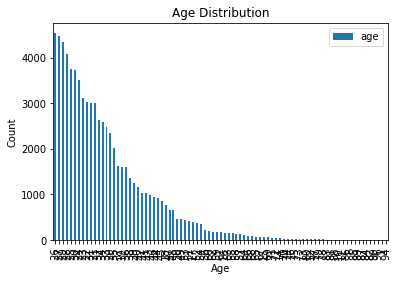

In [6]:
print('No. of UNIQUE Ages:', ageGenderTrain.age.nunique())
print(ageGenderTrain.age.value_counts(sort=True, ascending=True))
ageGenderTrain.age.value_counts(ascending=False).plot.bar(legend=True, title='Age Distribution', xlabel='Age', ylabel='Count')

There is a wide distribution of ages. Although certain age groups are appearing most of the time while some are not frequent.<br> Below plot will show the top 15 age groups

Min age record: 1 yrs
Max age record: 96 yrs


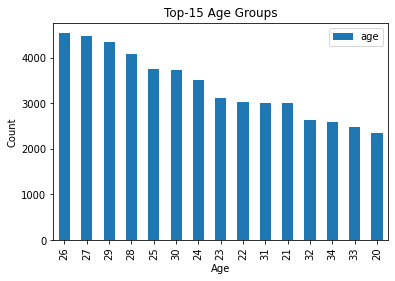

In [7]:
ageGenderTrain.age.value_counts(ascending=False)[:15].plot.bar(legend=True, title='Top-15 Age Groups', 
                                                               xlabel='Age', ylabel='Count')
print('Min age record:', ageGenderTrain.age.min(), 'yrs')
print('Max age record:', ageGenderTrain.age.max(), 'yrs')

##### Most of the ages are between 25-30. There are records with age as low as 1 and as high as 96

#### EDA for GROUP

No. of UNIQUE Groups: 12
M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64


<AxesSubplot:title={'center':'Demographic Distribution'}, ylabel='Group'>

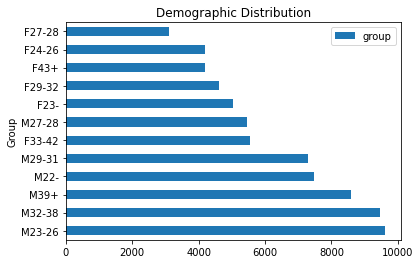

In [8]:
print('No. of UNIQUE Groups:', ageGenderTrain.group.nunique())
print(ageGenderTrain.group.value_counts())
ageGenderTrain.group.value_counts(ascending=False).plot(kind='barh', legend=True, title='Demographic Distribution',
                                                        xlabel='Group', ylabel='Count')

It can be observed that there are max records for M23-26 and M32-38. Lowest records for F27-28

#### EDA for TEST DATA

In [9]:
print(ageGenderTest.shape)
print('Columns in TEST Data:', ageGenderTest.columns.values)
print('\nData has any NULL Value: \n', ageGenderTest.isnull().any())
print('\nNo. of DUPLICATE records: ', ageGenderTest.duplicated().sum())

(112071, 1)
Columns in TEST Data: ['device_id']

Data has any NULL Value: 
 device_id    False
dtype: bool

No. of DUPLICATE records:  0


TEST Data has only DEVICE-ID information.

## 3.2 Working on PHONE BRAND

In [10]:
print(phoneBrand.shape) #There are 1,87,245 records
print('\nColumns: ',phoneBrand.columns) #Columns - device_id, phone_brand, device_model
print('\nFinding columns with any NULL value:')
print(phoneBrand.isnull().any()) # No field is empty
print('\nNo. of Duplicate Records: ',phoneBrand.duplicated().sum())

(187245, 3)

Columns:  Index(['device_id', 'phone_brand', 'device_model'], dtype='object')

Finding columns with any NULL value:
device_id       False
phone_brand     False
device_model    False
dtype: bool

No. of Duplicate Records:  523


In [11]:
phoneBrand.drop_duplicates(keep='first', inplace=True)

#### EDA for DEVICE_ID

In [12]:
print('No. of Unique Records: ',phoneBrand.device_id.nunique()) 
print('Duplicate DEVICE_IDs: ',phoneBrand.device_id.duplicated().sum()) 

No. of Unique Records:  186716
Duplicate DEVICE_IDs:  6


In [13]:
phoneBrand = phoneBrand.drop_duplicates(subset=['device_id'], keep='first') #Removing Duplicates

In [14]:
phoneBrand.shape

(186716, 3)

#### EDA for PHONE_BRAND

Unique Phone Brands are:  131
小米      43107
三星      34191
华为      32465
vivo    14342
OPPO    14239
        ...  
西门子         1
嘉源          1
碟米          1
极米          1
瑞高          1
Name: phone_brand, Length: 131, dtype: int64


<AxesSubplot:title={'center':'Phone Brands Distribution'}, xlabel='Phone Brand', ylabel='Count'>

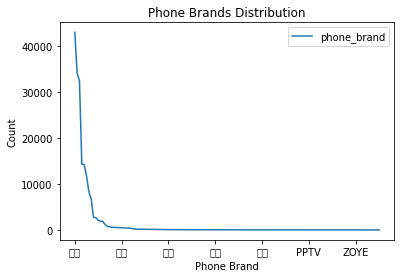

In [15]:
print('Unique Phone Brands are: ',phoneBrand.phone_brand.nunique())
print(phoneBrand.phone_brand.value_counts())
phoneBrand.phone_brand.value_counts().plot.line(legend=True, title='Phone Brands Distribution', 
                                                xlabel='Phone Brand', ylabel='Count') # Some brands are frequently used

Some phone brands are very common. But, most of the phone brands are not widely used. Below graphs will show us top-20 and bottom-20 phone brands

<AxesSubplot:title={'center':'Top-20 Phone Brands'}, ylabel='Phone Brand'>

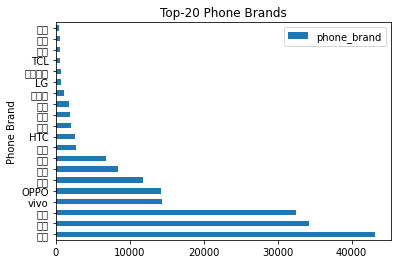

In [16]:
phoneBrand.phone_brand.value_counts(sort=True, ascending=False)[:20].plot.barh(legend=True, title='Top-20 Phone Brands', 
                                                                               xlabel='Phone Brand', ylabel='Count')

It can be seen that around 6 phone brands have device_ids more than 10K.

<AxesSubplot:title={'center':'Bottom-20 Phone Brands'}, ylabel='Phone Brand'>

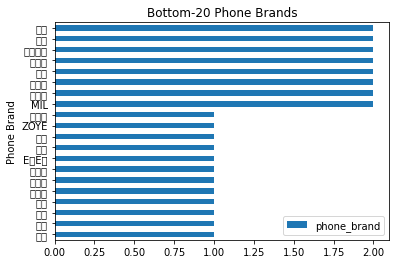

In [17]:
phoneBrand.phone_brand.value_counts(ascending=True)[:20].plot.barh(legend=True, title='Bottom-20 Phone Brands', 
                                                                   xlabel='Phone Brand', ylabel='Count')

And most of the phone brands have very less frequency in the dataset

##### So, we can conclude that there are certain PHONE-BRANDS that are widely used whereas some are rarely used

#### EDA for DEVICE_MODEL

Unique DEVICE MODELs: 1599
红米note             7343
MI 3               5699
MI 2S              5301
Galaxy Note 3      5010
MI 4               4788
                   ... 
DM                    1
飞马3                   1
A269                  1
Galaxy S DUOS 2       1
2016版 Galaxy J7       1
Name: device_model, Length: 1599, dtype: int64


<AxesSubplot:title={'center':'Device Model Distribution'}, xlabel='Device Model', ylabel='Count'>

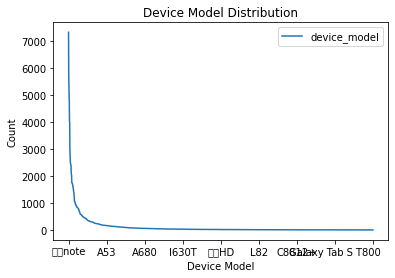

In [18]:
print('Unique DEVICE MODELs:',phoneBrand.device_model.nunique())
print(phoneBrand.device_model.value_counts())
phoneBrand.device_model.value_counts().plot.line(legend=True, title='Device Model Distribution', 
                                                 xlabel='Device Model', ylabel='Count') # Some models are frequently used

Same observation for Device Models as well. Some models are very common. But, most of the models are not widely used. Below graphs will show us top-20 and bottom-20 models.

<AxesSubplot:title={'center':'Top-20 Device Models'}, ylabel='Device Model'>

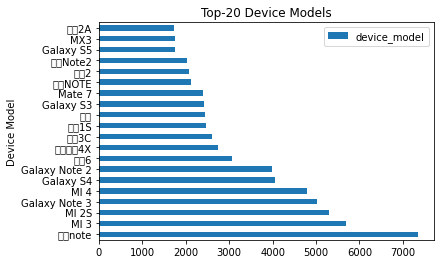

In [19]:
phoneBrand.device_model.value_counts(ascending=False)[:20].plot.barh(legend=True, title='Top-20 Device Models', 
                                                                     xlabel='Device Model', ylabel='Count')

It can be seen that around 14 models have frequency more than 2K in the dataset.

<AxesSubplot:title={'center':'Bottom-20 Device Models'}, ylabel='Device Model'>

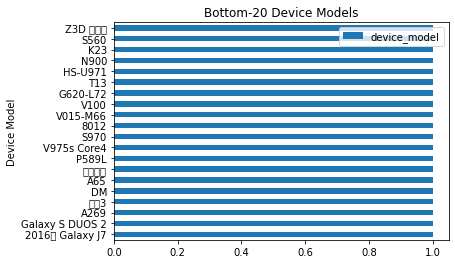

In [20]:
phoneBrand.device_model.value_counts(ascending=True)[:20].plot.barh(legend=True, title='Bottom-20 Device Models', 
                                                                    xlabel='Device Model', ylabel='Count')

And most of the models have very less frequency in the dataset

##### So, we can conclude that some models are widely used whereas some are very rarely used

## 3.3 EDA for APP_LABELS

In [21]:
print(appLabels.shape) #4,59,943 records
print('\nColumns:\n',appLabels.columns.values)
print('\nAny Columns with NULL value:\n', appLabels.isnull().any())
print('\nNo. of DUPLICATE Records:', appLabels.duplicated().sum())

(459943, 2)

Columns:
 ['app_id' 'label_id']

Any Columns with NULL value:
 app_id      False
label_id    False
dtype: bool

No. of DUPLICATE Records: 491


In [22]:
appLabels.drop_duplicates(keep='first', inplace=True)
appLabels.shape #4,59,452 records left now

(459452, 2)

In [23]:
appLabels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


#### EDA for APP_ID

UNIQUE APP IDs: 113211
6792270137491452041     25
-4550209074213737101    22
7334124244583991496     20
33792862810792679       20
-4581899107652088128    19
                        ..
-1280969471365101482     1
-2565795030628870096     1
-9222877069545393219     1
-2236783950262793645     1
9222488106573038706      1
Name: app_id, Length: 113211, dtype: int64


<AxesSubplot:title={'center':'Top-20 APP IDs'}, xlabel='APP IDs', ylabel='Count'>

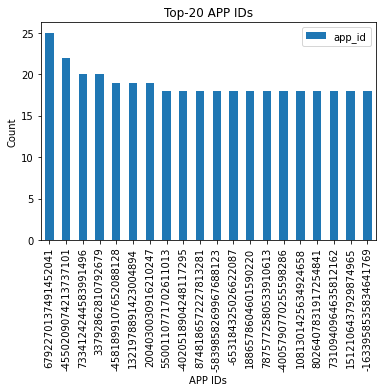

In [24]:
print('UNIQUE APP IDs:', appLabels.app_id.nunique() )
print(appLabels.app_id.value_counts())
appLabels.app_id.value_counts()[:20].sort_values(ascending=False).plot(kind='bar', legend=True, title='Top-20 APP IDs', 
                                                                       xlabel='APP IDs', ylabel='Count')

##### There are some APP-IDs that have multiple labels defined against them whereas most of the APP-IDs have less than 10 labels defined against them.

#### EDA for LABEL_ID

UNIQUE APP IDs: 507
548    56902
405    53936
794    49320
795    48707
704    45697
       ...  
155        1
921        1
563        1
48         1
146        1
Name: label_id, Length: 507, dtype: int64


<AxesSubplot:title={'center':'Top-20 Labels'}, xlabel='Label IDs', ylabel='Count'>

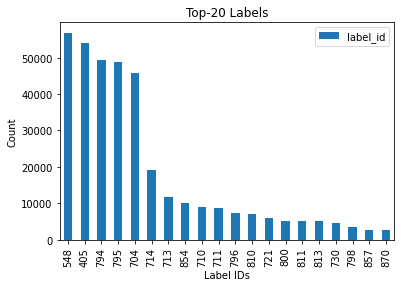

In [25]:
print('UNIQUE APP IDs:', appLabels.label_id.nunique())
print(appLabels.label_id.value_counts())
appLabels.label_id.value_counts()[:20].sort_values(ascending=False).plot(kind='bar', legend=True, title='Top-20 Labels', 
                                                                         xlabel='Label IDs', ylabel='Count')

##### Similarly, some LABEL-IDs are applied on most of the APP-IDs. But, most of the LABEL-IDs are applied on very few APP-IDs

## 3.4 EDA for EVENTS Data

In [26]:
print(eventsData.shape)
print('\nColumns:\n', eventsData.columns.values)
print('\nColumns with NULL values:\n', eventsData.isnull().any())
print('\nNo of DUPLICATE Records:', eventsData.duplicated().sum())
eventsData.head()

(3252950, 5)

Columns:
 ['event_id' 'device_id' 'timestamp' 'longitude' 'latitude']

Columns with NULL values:
 event_id     False
device_id    False
timestamp    False
longitude    False
latitude     False
dtype: bool

No of DUPLICATE Records: 0


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [27]:
print('No. of UNIQUE Events:', eventsData.event_id.nunique())

No. of UNIQUE Events: 3252950


#### EDA For DEVICE_ID

In [28]:
print('No. of UNIQUE Device IDs:', eventsData.device_id.nunique())
print(eventsData.device_id.value_counts())

No. of UNIQUE Device IDs: 60865
1186608308763918427     33426
3915082290673137129     14568
-1656894751624916732     6731
-6242501228649113250     4150
-8340098378141155823     3973
                        ...  
6960611430997662107         1
9146497636646056842         1
2473338558743118735         1
-134963855807446943         1
-6444090527106263724        1
Name: device_id, Length: 60865, dtype: int64


There are some devices for which multiple events are generated.

<AxesSubplot:title={'center':'Distribution of Device IDs in the EVENTs Data'}, xlabel='Device ID', ylabel='Count'>

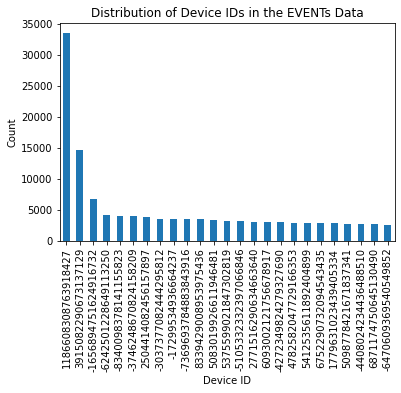

In [29]:
eventsData.device_id.value_counts()[:25].sort_values(ascending=False).plot.bar(title='Distribution of Device IDs in the EVENTs Data', 
                                                                               xlabel='Device ID', ylabel='Count')

It can be observed that most of the Device IDs have less than 5K events generated. Only 3 devices have more than 5K events generated

#### EDA for TIMESTAMP

In [30]:
print('Any NULL Record:', eventsData.timestamp.isnull().any())
print('Record with Earliest TIMESTAMP:', eventsData.timestamp.min()) # First event recorded at 30-Apr-2016 23:52:24
print('Record with Latest TIMESTAMP:', eventsData.timestamp.max()) # First event recorded at 08-May-2016 00:00:08
#----Events Data is available for around 8days----

Any NULL Record: False
Record with Earliest TIMESTAMP: 2016-04-30 23:52:24
Record with Latest TIMESTAMP: 2016-05-08 00:00:08


#### EDA for LATITUDE-LONGITUDE

In [31]:
print('Any NULL Longitude Record:', eventsData.longitude.isnull().any())
print('Any NULL Longitude Record:', eventsData.longitude.isna().any())
print('Any NULL Latitude Record:', eventsData.latitude.isnull().any())
print('Any NULL Latitude Record:', eventsData.latitude.isna().any())
print('\nDistribution of Latitude-Longitude:\n')
print(eventsData.longitude.value_counts(normalize=True))
print(eventsData.latitude.value_counts(normalize=True))

Any NULL Longitude Record: False
Any NULL Longitude Record: False
Any NULL Latitude Record: False
Any NULL Latitude Record: False

Distribution of Latitude-Longitude:

0.00      2.977946e-01
1.00      2.347469e-02
104.00    8.600501e-03
116.39    4.534653e-03
116.33    2.066125e-03
              ...     
151.18    3.074133e-07
101.11    3.074133e-07
101.36    3.074133e-07
93.49     3.074133e-07
122.59    3.074133e-07
Name: longitude, Length: 3588, dtype: float64
 0.00     2.978696e-01
 1.00     2.347869e-02
 30.00    8.750826e-03
 39.91    5.929695e-03
 34.74    2.140826e-03
              ...     
 18.87    3.074133e-07
 46.77    3.074133e-07
-8.75     3.074133e-07
 44.77    3.074133e-07
 43.13    3.074133e-07
Name: latitude, Length: 3086, dtype: float64


<b>Above data shows that almost 30% records have Latitude-Langitude as '0' and 2% records have '1'. 
    So, this does not seem to be a useful feature</b>

## 3.5 EDA for APP_EVENTS

In [32]:
print(appEventsData.shape)
print('Columns: ', appEventsData.columns.values)
print('\nColumns with NULL values:\n', appEventsData.isnull().any())
print('\nDuplicate Records:', appEventsData.duplicated().sum())
appEventsData.head()

(32473067, 4)
Columns:  ['event_id' 'app_id' 'is_installed' 'is_active']

Columns with NULL values:
 event_id        False
app_id          False
is_installed    False
is_active       False
dtype: bool

Duplicate Records: 0


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


#### EDA for EVENT_ID and APP_ID

No. of UNIQUE Events: 1488096

APP ID Distribution:
 8693964245073640147    1151391
5927333115845830913     898788
4348659952760821294     795995
628020936226491308      620659
3433289601737013244     373186
                        ...   
6375709340621330499          1
3811327208780951753          1
4559633797604230781          1
8290171066357643813          1
-114679207763663119          1
Name: app_id, Length: 19237, dtype: int64


<AxesSubplot:title={'center':'Distribution of APP IDs - Top-20 APP IDs'}, xlabel='APP IDs', ylabel='Count'>

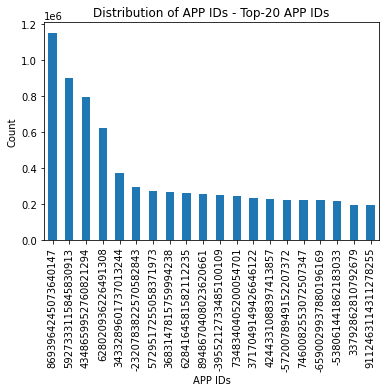

In [33]:
print('No. of UNIQUE Events:', appEventsData.event_id.nunique())

print('\nAPP ID Distribution:\n', appEventsData.app_id.value_counts())
appEventsData.app_id.value_counts()[:20].sort_values(ascending=False).plot.bar(title='Distribution of APP IDs - Top-20 APP IDs', 
                                                                               xlabel='APP IDs', ylabel='Count')

Certain APP-IDs are widely generated thru the events. But, most of the APP-IDs are not used frequently.

IS_INSTALLED Distribution:
 1    32473067
Name: is_installed, dtype: int64


<AxesSubplot:title={'center':'Distribution of IS_INSTALLED'}, ylabel='is_installed'>

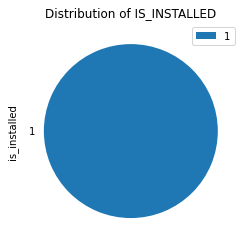

In [34]:
print('IS_INSTALLED Distribution:\n', appEventsData.is_installed.value_counts())
appEventsData.is_installed.value_counts().plot.pie(legend=True, title='Distribution of IS_INSTALLED')

##### IS_INSTALLED is set to '1' for all the records. So, this does not seem to be a useful feature. Hence, we can drop it.

IS_ACTIVE Distribution:
 0    19740071
1    12732996
Name: is_active, dtype: int64


0    0.607891
1    0.392109
Name: is_active, dtype: float64

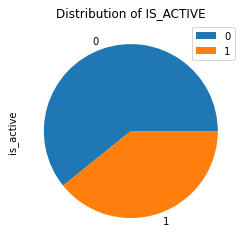

In [35]:
print('IS_ACTIVE Distribution:\n', appEventsData.is_active.value_counts())
appEventsData.is_active.value_counts().plot.pie(legend=True, title='Distribution of IS_ACTIVE')
appEventsData.is_active.value_counts(normalize=True)

##### Almost 60% of the APPs are NOT ACTIVE. This might be useful feature.

## 3.6 SHAPE of the Data

In [36]:
print('Train Data Shape: ', ageGenderTrain.shape)
print('Test Data Shape: ', ageGenderTest.shape)
print('Phone Brand Shape: ', phoneBrand.shape)
print('APP Labels Shape: ', appLabels.shape)
print('EVENTS Data Shape: ', eventsData.shape)
print('APP EVENTS Data Shape: ', appEventsData.shape)

Train Data Shape:  (74645, 4)
Test Data Shape:  (112071, 1)
Phone Brand Shape:  (186716, 3)
APP Labels Shape:  (459452, 2)
EVENTS Data Shape:  (3252950, 5)
APP EVENTS Data Shape:  (32473067, 4)


# 4. Feature Engineering

## 4.1. Handling APP_LABEL
We observed that one APP_ID is mapped to one or more LABEL_IDs. Hence, instead of keeping separate records for each APP_ID, let's group the data as per APP_ID

In [37]:
label = LabelEncoder().fit(appLabels.app_id)
appLabels.app_id = label.transform(appLabels.app_id)

In [38]:
appLabels = appLabels.groupby('app_id')['label_id'].apply(lambda x: " ".join(str(s) for s in x))

In [39]:
print(appLabels.shape)
appLabels.head()

(113211,)


app_id
0                        710 704 548 810 795 794 405
1                        710 704 548 810 795 794 405
2                     710 704 548 810 795 794 405 13
3                        756 761 787 777 782 405 730
4    262 251 405 730 756 759 773 780 786 548 854 870
Name: label_id, dtype: object

## 4.2 Handling APP_EVENTS
1. With the newly mapped label_id, we will not map this app_id with the app_id in the APP_EVENTS table
2. IS_INSTALLED is '1' for all records. So, this is field is not needed.

### 4.2.1 Handling 'IS_ACTIVE' field

In [40]:
# REF - https://github.com/MahendharReddy16/Talking-data-/blob/master/final%20model.ipynb
apps = appEventsData.groupby("event_id")["is_active"].apply(lambda x: " ".join(str(s) for s in x))
print(apps.shape)
eventsData['apps_active'] = eventsData.event_id.map(apps)
activeAppEvents = eventsData.groupby("device_id")["apps_active"].apply(lambda x: " ".join(str(s) for s in x if str(s)!='nan'))
appEventsData = appEventsData.drop(['is_installed', 'is_active'], axis=1)
print(appEventsData.shape)
appEventsData.head()

(1488096,)
(32473067, 2)


,event_id,app_id
0,2,5927333115845830913
1,2,-5720078949152207372
2,2,-1633887856876571208
3,2,-653184325010919369
4,2,8693964245073640147


### 4.2.2 Handling APP_ID

In [41]:
labelE = LabelEncoder().fit(appEventsData.app_id)
appEventsData.app_id = labelE.transform(appEventsData.app_id)

appids = appEventsData.groupby("event_id")["app_id"].apply(lambda x: " ".join(str(s) for s in x))

appEventsData['appids_active'] = appEventsData.event_id.map(appids)

print(appEventsData.shape)
appEventsData.head()

(32473067, 3)


,event_id,app_id,appids_active
0,2,14966,14966 5676 890 6604 18542 13767 8298 19017 328...
1,2,5676,14966 5676 890 6604 18542 13767 8298 19017 328...
2,2,890,14966 5676 890 6604 18542 13767 8298 19017 328...
3,2,6604,14966 5676 890 6604 18542 13767 8298 19017 328...
4,2,18542,14966 5676 890 6604 18542 13767 8298 19017 328...


In [42]:
appEventsData['appLabel'] = appEventsData['app_id'].map(appLabels)
print(appEventsData.shape)
appEventsData.head()

(32473067, 4)


,event_id,app_id,appids_active,appLabel
0,2,14966,14966 5676 890 6604 18542 13767 8298 19017 328...,968
1,2,5676,14966 5676 890 6604 18542 13767 8298 19017 328...,859 854 548
2,2,890,14966 5676 890 6604 18542 13767 8298 19017 328...,713 704 548
3,2,6604,14966 5676 890 6604 18542 13767 8298 19017 328...,804 795 794 405
4,2,18542,14966 5676 890 6604 18542 13767 8298 19017 328...,714 704 548


One Event has many APP_IDs mapped to it. Hence, again grouping on the basis of APP_ID and combining the labels for each event_id

In [43]:
aED = appEventsData.groupby(['event_id'])['appLabel'].apply(lambda x: " ".join(str(s) for s in x))
aED.head()

event_id
1000000    711 714 548 704 796 795 794 405 711 714 548 70...
1000004    713 704 548 711 714 548 704 812 795 794 405 97...
1000005    713 704 548 789 790 787 777 782 405 730 710 71...
1000006                                  971 168 223 139 969
1000007    862 854 548 710 704 548 548 854 859 714 704 54...
Name: appLabel, dtype: object

In [44]:
appEventsData = appEventsData.drop(['app_id','appLabel'], axis=1)
appEventsData.drop_duplicates(keep='first', inplace=True)
appEventsData.head()

,event_id,appids_active
0,2,14966 5676 890 6604 18542 13767 8298 19017 328...
19,6,7562 15377 14966 12359 3012 16348 3570 1598 18...
57,7,4917 5312 11572 13527 17421 6604 15439 17827 6...
97,9,7562 4917 7185 15968 14966 13527 5082 18542 28...
132,16,7562 14092 890 11453 9507 6587 1227 14536 4147...


## 4.2 Handling EVENTS
<b>Creating 2 new features for DAY of Week and HOUR of Day</b><br>
    These 2 features will help to identify which time of the day most events are created and which day of the week there are a lot of events.

In [45]:
eventsData['dayOfWeek'] = eventsData.timestamp.dt.dayofweek
eventsData['activityhour'] = eventsData.timestamp.dt.hour

#### Creating additional feature to distinguish which part of day is the event.

In [46]:
def findDayPart(x):
    if (x>21 and x <=23) or (x>=0 and x<=6):
        return 0 #NIGHT
    if x>6 and x<9:
        return 1 #MORNING
    if x>=9 and x<=18:
        return 2 #PEAKHOURS
    if x>18 and x<22:
        return 3 #EVENING

In [47]:
eventsData['dayPart'] = eventsData['activityhour'].apply(findDayPart)

#### Lat-long coorditates for cities in China are in range: 
    Latitude from 18.24306 to 52.33333 and Longitude from 75.98951 to 134.28917. 
#### But most of the values in the dataset are either '0' or '1'. 
#### We cannot find suitable values for such a big dataset. 
#### Hence, it will be good to remove Latitude and Longitude features

In [48]:
eventsData = eventsData.drop(['timestamp','latitude', 'longitude'], axis=1)
eventsData.head()

,event_id,device_id,apps_active,dayOfWeek,activityhour,dayPart
0,1,29182687948017175,NaN,6,0,0
1,2,-6401643145415154744,1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0,6,0,0
2,3,-4833982096941402721,NaN,6,0,0
3,4,-6815121365017318426,NaN,6,0,0
4,5,-5373797595892518570,NaN,6,0,0


#### Mapping app-labels based on the device_id

In [49]:
eventsData['appLabel'] = eventsData['event_id'].map(aED)
eventsData.head()

,event_id,device_id,apps_active,dayOfWeek,activityhour,dayPart,appLabel
0,1,29182687948017175,NaN,6,0,0,NaN
1,2,-6401643145415154744,1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0,6,0,0,968 859 854 548 713 704 548 804 795 794 405 71...
2,3,-4833982096941402721,NaN,6,0,0,NaN
3,4,-6815121365017318426,NaN,6,0,0,NaN
4,5,-5373797595892518570,NaN,6,0,0,NaN


In [50]:
eventsData.appLabel = eventsData.appLabel.fillna('missing')

In [51]:
aData = eventsData.groupby('device_id').appLabel.apply(lambda x: " ".join(str(s) for s in x))
aData.head()

device_id
-100015673884079572     714 704 548 803 795 794 405 18 99 803 795 794 ...
-1000458529741848912    803 795 794 405 800 795 794 405 714 704 548 81...
-1000667340060427374    missing missing missing 873 854 548 706 704 54...
-100098646088222553     missing missing missing 857 874 16 548 854 710...
-100101996136889832     missing 810 795 794 405 714 704 548 810 795 79...
Name: appLabel, dtype: object

## 4.3 Handling PHONE_BRAND_DEVICE_MODEL
Instead of keeping device model separate, joining phone_brand and device_model together.

In [52]:
phoneBrand.device_model = phoneBrand.phone_brand.str.cat(" "+phoneBrand.device_model)

In [53]:
phoneBrand.phone_brand = phoneBrand.phone_brand.map(str.strip).map(str.lower)
phoneBrand.device_model = phoneBrand.device_model.map(str.strip).map(str.lower)
print(phoneBrand.shape)
phoneBrand.head()

(186716, 3)


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,小米 红米
1,1277779817574759137,小米,小米 mi 2
2,5137427614288105724,三星,三星 galaxy s4
3,3669464369358936369,sugar,sugar 时尚手机
4,-5019277647504317457,三星,三星 galaxy note 2


#### Dropping 'appLabel' column from EVENTS and APP_EVENTS data

In [54]:
eventsData = eventsData.drop(['appLabel'], axis=1)

print(eventsData.columns.values)
print(appEventsData.columns.values)

['event_id' 'device_id' 'apps_active' 'dayOfWeek' 'activityhour' 'dayPart']
['event_id' 'appids_active']


## 4.4 Joining Various Dataset to form Final Datasets

 ### 4.4.1 Joining GENDER_AGE_TRAIN and PHONE_BRAND on DEVICE_ID

In [55]:
gatrain = ageGenderTrain.merge(phoneBrand, on='device_id', how='left')
gatest = ageGenderTest.merge(phoneBrand, on='device_id', how='left')

print('Shape of TRAIN Data after merging:', gatrain.shape)
print('Shape of TEST Data after merging:', gatest.shape)

gatrain.head()

Shape of TRAIN Data after merging: (74645, 6)
Shape of TEST Data after merging: (112071, 3)


,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,小米,小米 mi 2
1,-2897161552818060146,M,35,M32-38,小米,小米 mi 2
2,-8260683887967679142,M,35,M32-38,小米,小米 mi 2
3,-4938849341048082022,M,30,M29-31,小米,小米 红米note
4,245133531816851882,M,30,M29-31,小米,小米 mi 3


In [56]:
print('Columns: ', gatrain.columns.values)
print('\nColumns with NULL values:\n', gatrain.isnull().any())
print('\nDuplicate Records:', gatrain.duplicated().sum())

Columns:  ['device_id' 'gender' 'age' 'group' 'phone_brand' 'device_model']

Columns with NULL values:
 device_id       False
gender          False
age             False
group           False
phone_brand     False
device_model    False
dtype: bool

Duplicate Records: 0


### 4.4.2 Joining EVENTS and APP_EVENTS

In [57]:
eventApps=appEventsData.merge(eventsData, how='left',on='event_id')
print(eventApps.shape)
eventApps.head()

(1488096, 7)


,event_id,appids_active,device_id,apps_active,dayOfWeek,activityhour,dayPart
0,2,14966 5676 890 6604 18542 13767 8298 19017 328...,-6401643145415154744,1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0,6,0,0
1,6,7562 15377 14966 12359 3012 16348 3570 1598 18...,1476664663289716375,1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 ...,6,0,0
2,7,4917 5312 11572 13527 17421 6604 15439 17827 6...,5990807147117726237,0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 ...,6,0,0
3,9,7562 4917 7185 15968 14966 13527 5082 18542 28...,-2073340001552902943,0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 ...,6,0,0
4,16,7562 14092 890 11453 9507 6587 1227 14536 4147...,9070651185984875886,0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,6,0,0


#### Checking which records from TRAIN and TEST dataset have EVENTS created against them

In [58]:
print("% Train Data with EVENTs Data is:",((gatrain.device_id.isin(eventApps.device_id).sum())/gatrain.shape[0])*100,"%")
print("% Test Data with EVENTs Data is:",((gatest.device_id.isin(eventApps.device_id).sum())/gatest.shape[0])*100,"%")

% Train Data with EVENTs Data is: 31.201018152588922 %
% Test Data with EVENTs Data is: 31.383676419412694 %


#### This shows that 31% of records of TRAIN and TEST data each have EVENTS data available.
#### Thus, we will need to SPLIT the Train and Test Data into TWO groups i] With EVENTS Data and ii] Without EVENTS Data

### 4.4.3 Forming a dataframe WITH EVENTs DATA

In [59]:
trainEventData = gatrain.loc[gatrain.device_id.isin(eventApps.device_id)]
testEventData = gatest.loc[gatest.device_id.isin(eventApps.device_id)]
print(trainEventData.shape)
print(testEventData.shape)
trainEventData.head()

(23290, 6)
(35172, 3)


,device_id,gender,age,group,phone_brand,device_model
2,-8260683887967679142,M,35,M32-38,小米,小米 mi 2
11,7477216237379271436,F,37,F33-42,华为,华为 荣耀6 plus
13,6352067998666467520,M,32,M32-38,华为,华为 荣耀畅玩4x
15,1508636020748379883,F,28,F27-28,华为,华为 荣耀畅玩4x
18,-6876541075223249434,M,75,M39+,魅族,魅族 魅蓝note


In [60]:
trainEventData['appLabel'] = trainEventData['device_id'].map(aData)

testEventData['appLabel'] = testEventData['device_id'].map(aData)

print(trainEventData.shape)
print(testEventData.shape)
trainEventData.head()

(23290, 7)
(35172, 4)


,device_id,gender,age,group,phone_brand,device_model,appLabel
2,-8260683887967679142,M,35,M32-38,小米,小米 mi 2,179 873 854 548 870 854 548 925 922 927 926 54...
11,7477216237379271436,F,37,F33-42,华为,华为 荣耀6 plus,710 711 714 548 704 711 714 548 704 812 795 79...
13,6352067998666467520,M,32,M32-38,华为,华为 荣耀畅玩4x,798 795 794 405 714 704 548 11 968 229 969 714...
15,1508636020748379883,F,28,F27-28,华为,华为 荣耀畅玩4x,missing missing missing missing 798 795 794 40...
18,-6876541075223249434,M,75,M39+,魅族,魅族 魅蓝note,missing missing missing missing missing missin...


In [61]:
train1 = trainEventData.merge(eventApps, on='device_id', how='left')
test1 = testEventData.merge(eventApps, on='device_id', how='left')

print('Train Shape after merging:', train1.shape)
print('Test Shape after merging:', test1.shape)
train1.head()

Train Shape after merging: (556375, 13)
Test Shape after merging: (889770, 10)


,device_id,gender,age,group,phone_brand,device_model,appLabel,event_id,appids_active,apps_active,dayOfWeek,activityhour,dayPart
0,-8260683887967679142,M,35,M32-38,小米,小米 mi 2,179 873 854 548 870 854 548 925 922 927 926 54...,2479656,13233 3797 15473 9014 18629 11645 17917 567 15...,0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 ...,6,14,2
1,7477216237379271436,F,37,F33-42,华为,华为 荣耀6 plus,710 711 714 548 704 711 714 548 704 812 795 79...,280934,13260 11067 15377 11720 14966 12359 12500 1110...,0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 ...,2,14,2
2,7477216237379271436,F,37,F33-42,华为,华为 荣耀6 plus,710 711 714 548 704 711 714 548 704 812 795 79...,935225,13260 11067 15377 14966 11720 12359 12500 1110...,0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 ...,4,18,2
3,7477216237379271436,F,37,F33-42,华为,华为 荣耀6 plus,710 711 714 548 704 711 714 548 704 812 795 79...,1969680,13260 11067 15377 11720 14966 12359 12500 1110...,0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 ...,2,14,2
4,6352067998666467520,M,32,M32-38,华为,华为 荣耀畅玩4x,798 795 794 405 714 704 548 11 968 229 969 714...,7665,7562 15377 14966 12359 3570 18542 856 12234 18...,0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0,3,9,2


In [62]:
print('Columns: ', train1.columns.values)
print('\nColumns with NULL values:\n', train1.isnull().any())

Columns:  ['device_id' 'gender' 'age' 'group' 'phone_brand' 'device_model'
 'appLabel' 'event_id' 'appids_active' 'apps_active' 'dayOfWeek'
 'activityhour' 'dayPart']

Columns with NULL values:
 device_id        False
gender           False
age              False
group            False
phone_brand      False
device_model     False
appLabel         False
event_id         False
appids_active    False
apps_active      False
dayOfWeek        False
activityhour     False
dayPart          False
dtype: bool


In [63]:
train1.device_id.nunique(),train1.apps_active.isnull().sum(), train1.appids_active.isnull().sum()

(23290, 0, 0)

### 4.4.4 Forming a dataframe WITHOUT EVENTs DATA

In [64]:
trainNoEventData = gatrain.loc[~gatrain.device_id.isin(eventApps.device_id)]
print(trainNoEventData.shape)

testNoEventData = gatest.loc[~gatest.device_id.isin(eventApps.device_id)]
print(testNoEventData.shape)

trainNoEventData.head()

(51355, 6)
(76899, 3)


,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,小米,小米 mi 2
1,-2897161552818060146,M,35,M32-38,小米,小米 mi 2
3,-4938849341048082022,M,30,M29-31,小米,小米 红米note
4,245133531816851882,M,30,M29-31,小米,小米 mi 3
5,-1297074871525174196,F,24,F24-26,oppo,oppo r1c


## 4.5 Final Dataset

In [65]:
finalTrainEvents = train1
finalTestEvents = test1
finalTrainNoEvents = trainNoEventData
finalTestNoEvents = testNoEventData

In [66]:
# REF - https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
print("=========================================")
finalTrainEvents.index = pd.RangeIndex(len(finalTrainEvents.index))
print('Train Data WITH Events:', finalTrainEvents.shape)
print(finalTrainEvents.head())
print("=========================================")
finalTrainNoEvents.index = pd.RangeIndex(len(finalTrainNoEvents.index))
print('Train Data WITHOUT Events:', finalTrainNoEvents.shape)
print("=========================================")
finalTrainNoEvents.head()

Train Data WITH Events: (556375, 13)
              device_id gender  age   group phone_brand device_model  \
0  -8260683887967679142      M   35  M32-38          小米      小米 mi 2   
1   7477216237379271436      F   37  F33-42          华为  华为 荣耀6 plus   
2   7477216237379271436      F   37  F33-42          华为  华为 荣耀6 plus   
3   7477216237379271436      F   37  F33-42          华为  华为 荣耀6 plus   
4   6352067998666467520      M   32  M32-38          华为    华为 荣耀畅玩4x   

                                            appLabel event_id  \
0  179 873 854 548 870 854 548 925 922 927 926 54...  2479656   
1  710 711 714 548 704 711 714 548 704 812 795 79...   280934   
2  710 711 714 548 704 711 714 548 704 812 795 79...   935225   
3  710 711 714 548 704 711 714 548 704 812 795 79...  1969680   
4  798 795 794 405 714 704 548 11 968 229 969 714...     7665   

                                       appids_active  \
0  13233 3797 15473 9014 18629 11645 17917 567 15...   
1  13260 11067 15377 11720 

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,小米,小米 mi 2
1,-2897161552818060146,M,35,M32-38,小米,小米 mi 2
2,-4938849341048082022,M,30,M29-31,小米,小米 红米note
3,245133531816851882,M,30,M29-31,小米,小米 mi 3
4,-1297074871525174196,F,24,F24-26,oppo,oppo r1c


In [67]:
print("=========================================")
finalTestEvents.index = pd.RangeIndex(len(finalTestEvents.index))
print('Test Data WITH Events:', finalTestEvents.shape)
print(finalTestEvents.head())
print("=========================================")
finalTestNoEvents.index = pd.RangeIndex(len(finalTestNoEvents.index))
print('Test Data WITHOUT Events:', finalTestNoEvents.shape)
print("=========================================")
finalTestNoEvents.head()

Test Data WITH Events: (889770, 10)
             device_id phone_brand device_model  \
0  1002079943728939269          小米    小米 小米note   
1  1002079943728939269          小米    小米 小米note   
2  1002079943728939269          小米    小米 小米note   
3  1002079943728939269          小米    小米 小米note   
4  1002079943728939269          小米    小米 小米note   

                                            appLabel event_id  \
0  968 548 854 860 871 714 723 548 704 707 715 54...   460577   
1  968 548 854 860 871 714 723 548 704 707 715 54...   755837   
2  968 548 854 860 871 714 723 548 704 707 715 54...  1171252   
3  968 548 854 860 871 714 723 548 704 707 715 54...  1805074   
4  968 548 854 860 871 714 723 548 704 707 715 54...  2145937   

                                       appids_active  \
0  14966 6724 634 9507 18542 8379 16387 13188 163...   
1                                         16387 5321   
2  14966 6724 634 9507 18542 8379 16387 13188 163...   
3  14966 6724 634 9507 18542 8379 16387 13

,device_id,phone_brand,device_model
0,-5893464122623104785,小米,小米 mi 2
1,-7560708697029818408,小米,小米 mi 2
2,289797889702373958,小米,小米 红米note
3,-402874006399730161,小米,小米 红米note
4,5751283639860028129,三星,三星 galaxy s4


### 4.5.1 Saving the CSV file

In [69]:
finalTrainNoEvents.to_csv('final_train_noevents.csv')
finalTestNoEvents.to_csv('final_test_noevents.csv')

In [70]:
finalTrainEvents.to_csv('final_train_events.csv')
finalTestEvents.to_csv('final_test_events.csv')

### 4.5.2 Saving the dataset in a compressed format using FEATHER

In [ ]:
# REF - https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d
# REF - https://pythontic.com/pandas/serialization/feather
finalTrainNoEvents.to_feather('final_train_noevents')
finalTestNoEvents.to_feather('final_test_noevents')
finalTrainEvents.to_feather('final_train_events')

In [ ]:
finalTestEvents.to_feather('final_test_events')